In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('marketing_data.csv')

In [8]:
df.columns = df.columns.str.strip()

In [10]:
print(df[['Dt_Customer', 'Income']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dt_Customer  2240 non-null   datetime64[ns]
 1   Income       2216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.1 KB
None


In [12]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})


In [13]:
df['Income'] = df['Income'].fillna(df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean'))

In [14]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2021 - df['Year_Birth']

In [15]:
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[mnt_cols].sum(axis=1)

In [16]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)


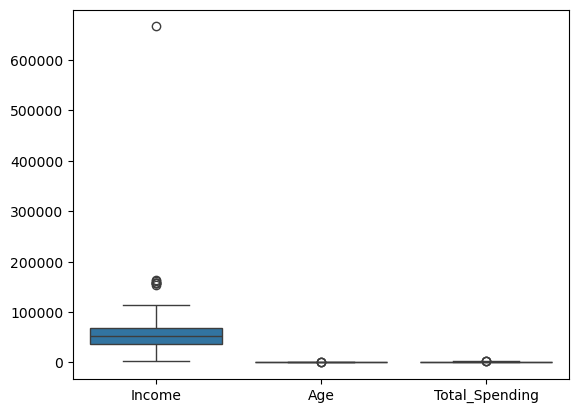

In [17]:
sns.boxplot(data=df[['Income', 'Age', 'Total_Spending']])
plt.show()

In [18]:
df = df[df['Income'] < 200000] 

In [19]:
edu_map = {'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
df['Education_Level'] = df['Education'].map(edu_map)

In [20]:
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Country'])

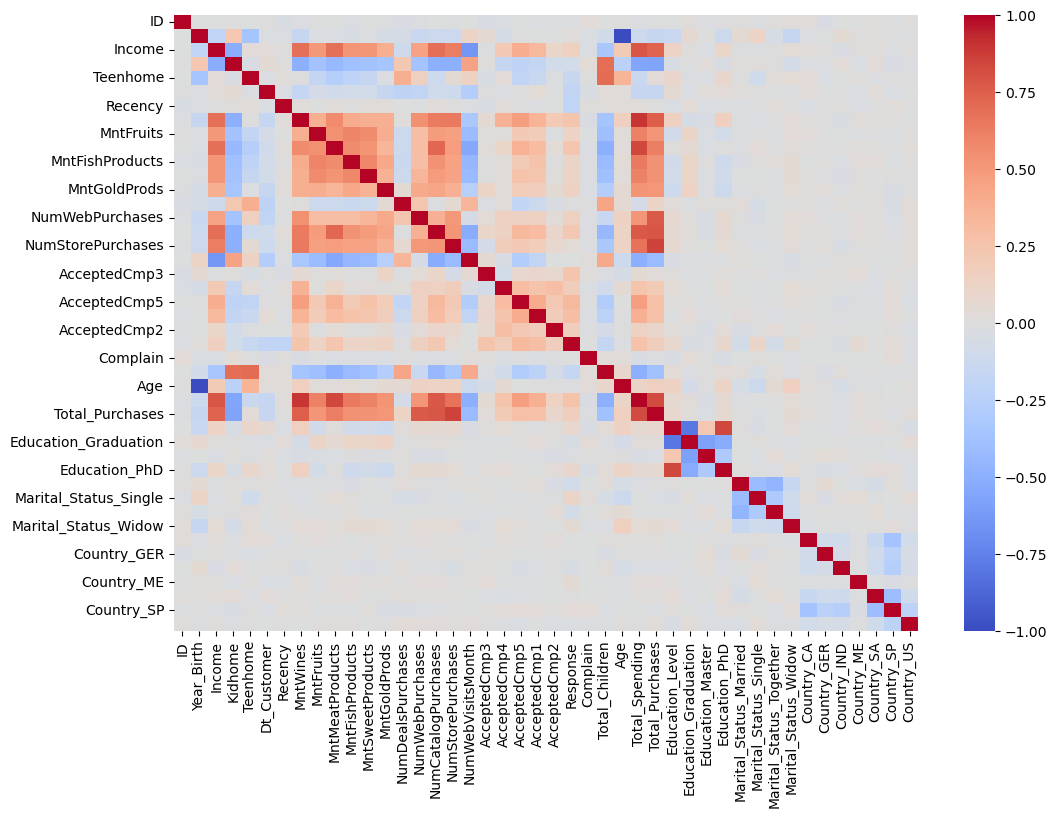

In [23]:
# First, identify and convert categorical columns to numeric using one-hot encoding
# or another appropriate encoding method
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df is your original dataframe
# Identify categorical columns (those with string values)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
if len(categorical_cols) > 0:
    # Create a new DataFrame with one-hot encoded columns
    # Changed 'sparse=False' to 'sparse_output=False' to match newer scikit-learn versions
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(
        encoded_data, 
        columns=encoder.get_feature_names_out(categorical_cols),
        index=df.index
    )
    
    # Combine with numeric columns
    numeric_cols = df.select_dtypes(exclude=['object']).columns
    df_numeric = pd.concat([df[numeric_cols], encoded_df], axis=1)
else:
    df_numeric = df  # If no categorical columns, use original df

# Now create the correlation heatmap with only numeric data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.show()

In [24]:
print("Correlation Age vs Store:", df['Age'].corr(df['NumStorePurchases']))

Correlation Age vs Store: 0.12804428448507738


In [25]:
# 7b: Customers with children prefer online shopping [9]
with_kids = df[df['Total_Children'] > 0]['NumWebPurchases']
no_kids = df[df['Total_Children'] == 0]['NumWebPurchases']
t_stat, p_val = ttest_ind(with_kids, no_kids)
print("P-value for Children vs Online:", p_val)

P-value for Children vs Online: 0.0009182643717250139


In [26]:
# 7d: US significantly outperforms the rest of the world in total purchase volumes [9]
us_data = df[df['Country'] == 'US']['Total_Purchases']
world_data = df[df['Country'] != 'US']['Total_Purchases']
t_stat_us, p_val_us = ttest_ind(us_data, world_data)
print("P-value for US vs World Volume:", p_val_us)

P-value for US vs World Volume: 0.14791245663807978


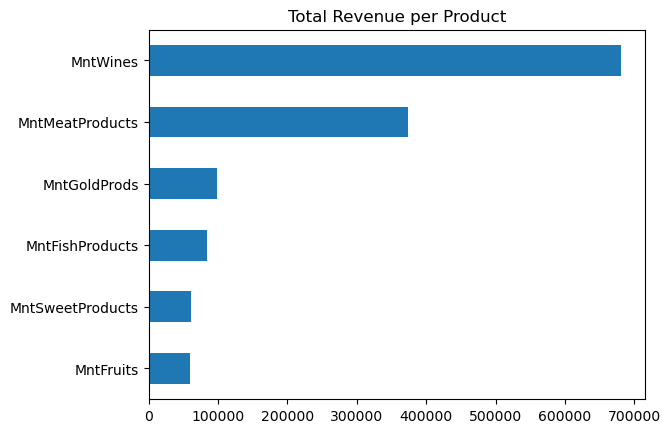

In [27]:
# 8a: Top performing and lowest revenue products [9]
df[mnt_cols].sum().sort_values().plot(kind='barh')
plt.title("Total Revenue per Product")
plt.show()

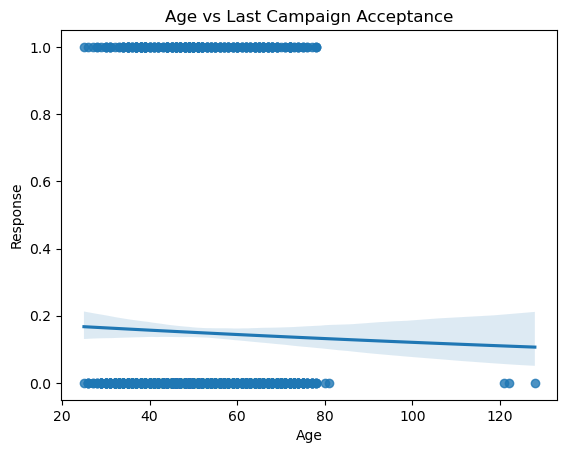

In [28]:
# 8b: Correlation between Age and Acceptance of the last campaign [9]
sns.regplot(x='Age', y='Response', data=df, logistic=True)
plt.title("Age vs Last Campaign Acceptance")
plt.show()

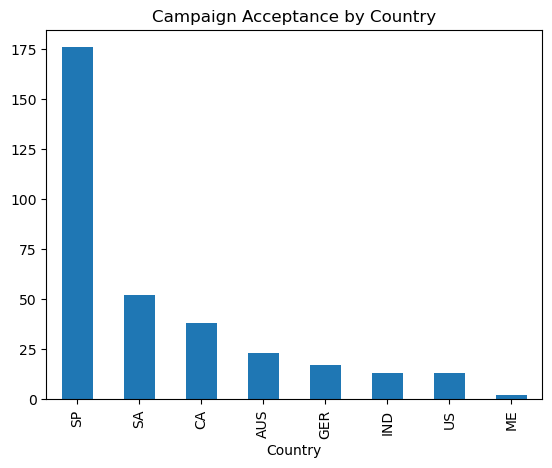

In [29]:
# 8c: Country with highest Acceptance of last campaign [10]
df.groupby('Country')['Response'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Campaign Acceptance by Country")
plt.show()

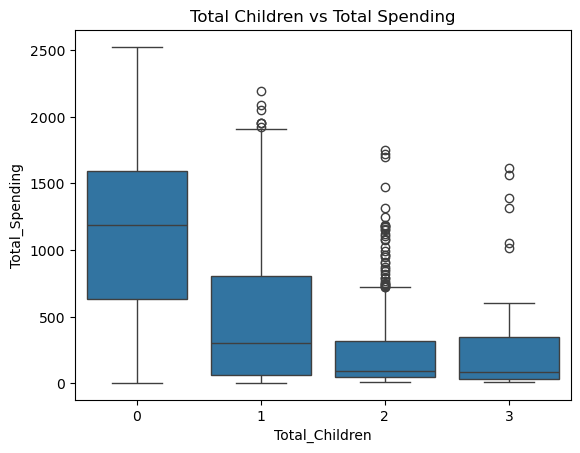

In [30]:
# 8d: Patterns in number of children vs total expenditure [10]
sns.boxplot(x='Total_Children', y='Total_Spending', data=df)
plt.title("Total Children vs Total Spending")
plt.show()


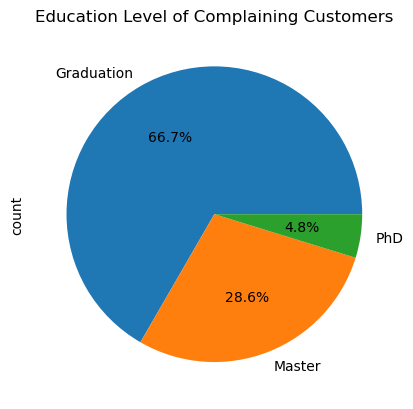

In [31]:
# 8e: Educational background of customers who complained in last two years [10]
df[df['Complain'] == 1]['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Education Level of Complaining Customers")
plt.show()